<a href="https://colab.research.google.com/github/a84597216/spamemail/blob/main/LIS501_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Import two dataset

In [ ]:
missing_values = ["n/a", "na", "--" , "empty" , "?" , "??" , "---" , "-", "__" , "___" , "___ ___"]
email1 = pd.read_csv('/content/completeSpamAssassin.csv' , na_values=missing_values)
email2 = pd.read_csv('/content/spam.csv' , na_values=missing_values)

In [ ]:
email1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        5512 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [ ]:
email2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
email1.isnull().sum()

Unnamed: 0      0
Body          534
Label           0
dtype: int64

In [ ]:
email1 = email1.fillna(np.nan)

In [ ]:
email1 = email1.dropna(subset=['Body'])

In [ ]:
email1.isnull().sum()

Unnamed: 0    0
Body          0
Label         0
dtype: int64

In [ ]:
email2.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
email1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 6043
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5512 non-null   int64 
 1   Body        5512 non-null   object
 2   Label       5512 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 172.2+ KB


In [ ]:
email1.columns = ['x1','text','Label']
email1 = email1.drop(['x1'],axis=1)

In [ ]:
email2.columns=['Label', 'text']

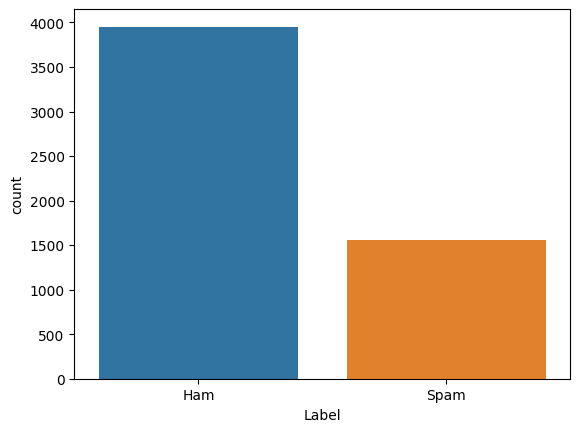

In [ ]:
gfg = sns.countplot(x = 'Label', data= email1)
#gfg.set(ylabel = "Count", title ='Ham / Spam')
gfg.set_xticks([0,1], labels=['Ham', 'Spam'])

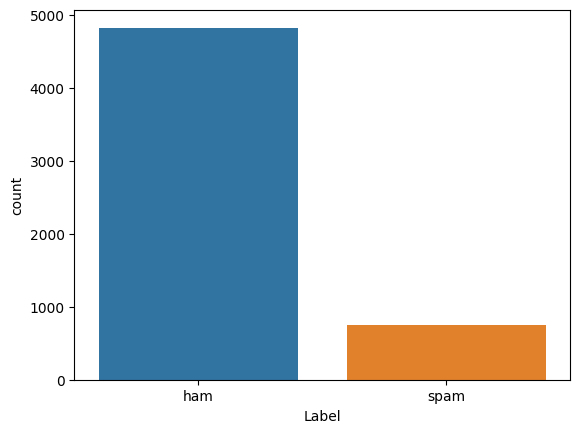

In [ ]:
gfg = sns.countplot(x = 'Label', data= email2)

# Combine two dataframe

In [ ]:
#Spam or ham email 1 for spam and 0 for ham

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(email2.Label.values)
email2.Label = le.transform(email2.Label)

In [ ]:
email2.head()

,Label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = pd.concat([email1, email2], ignore_index=True)
df = df.drop_duplicates(subset=['text'], keep='last')
df = df.sample(frac = 1)

df = df.reset_index()
df = df.drop(['index'],axis=1)

In [ ]:
df.head()

,text,Label
0,Ladies first and genus second k .,0
1,"Dear C. Greg Curry, This Network World Fusion ...",0
2,Ok not a problem will get them a taxi. C ing ...,0
3,What r u cooking me for dinner?,0
4,\nHome Based Business <!--\na:hover { color:#...,1


In [ ]:
# contain_values = df[df['text'].str.contains('Free entry in 2')]
# print (contain_values)

In [ ]:
df.shape

(10448, 2)

In [ ]:
from collections import Counter
Counter(df.Label).keys() , Counter(df.Label).values()

(dict_keys([0, 1]), dict_values([8430, 2018]))

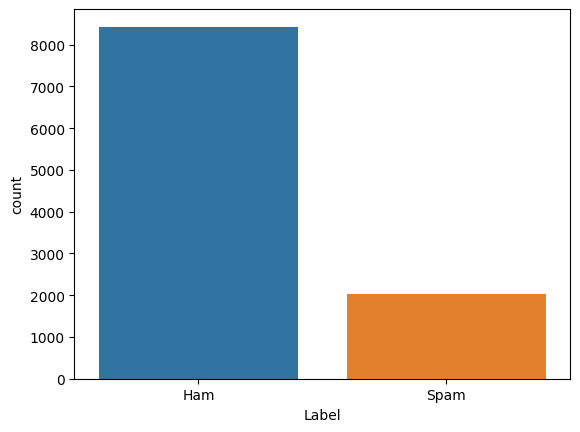

In [ ]:
gfg = sns.countplot(x = 'Label', data= df)
#gfg.set(ylabel = "Count", title ='Ham / Spam')
gfg.set_xticks([0,1], labels=['Ham', 'Spam'])

# Make a Wordcloud visualization

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ps = PorterStemmer()

In [ ]:
def basic_clean(x) :
    words = word_tokenize(x.lower())
    final = []
    
    #x = x.replace('\n', ' ').replace('\r', '')
    for word in words :     
        if word.isalnum():
            final.append(word)
    words = final[:]
    final= []
    
    for i in words :
        if i not in stop_words and i not in string.punctuation :
            final.append(i)
    words = final[:]
    final= []
    
    for i in words :
        final.append(ps.stem(i))
    words = final[:]
    final= []
    return ' '.join(words)
    

In [ ]:
v = df[df['Label'] == 1]
print (v)

                                                    text  Label  \
4      \nHome Based Business  <!--\na:hover { color:#...      1   
12     LIFE has never been this much fun and great un...      1   
15     Hi Friend,\n \nezDebtConsolidationInfo.com\n--...      1   
21     Urgent! Please call 0906346330. Your ABTA comp...      1   
22     \nHello, fork@xent.comHuman Growth Hormone The...      1   
...                                                  ...    ...   
10415  HAS YOUR MORTGAGE SEARCH GOT YOU DOWN?Win a $3...      1   
10418  Make Money Now!!\nTo Read More Information On ...      1   
10430  Easy to make "Between $200,000 and $500,000 ev...      1   
10436  Win the newest Harry Potter and the Order of ...      1   
10445  \nGREEN CARD\nfunction Go() \n{\nwindow.locati...      1   

                                              clean_text  
4      home base busi hover color cc0000 bold h1 colo...  
12     life never much fun great came made truli spec...  
15     hi friend d

In [ ]:
print('Before:', df['text'][12])
print('After: ', basic_clean(df['text'][12]))

Before: LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
After:  life never much fun great came made truli special wo forget enjoy one


In [ ]:
df['clean_text'] = df['text'].apply(lambda x : basic_clean(str(x)))

In [ ]:
from wordcloud import WordCloud

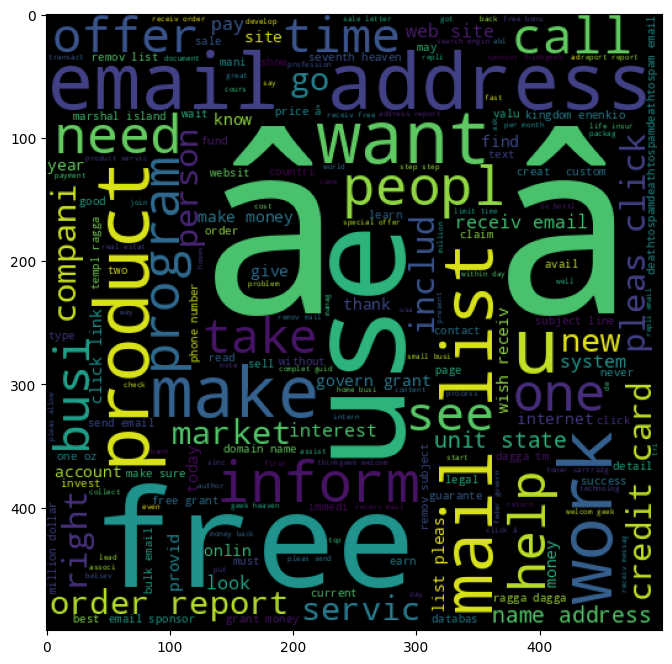

In [ ]:
# spam word cloud
body = ''.join(df[df['Label'] == 1]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)

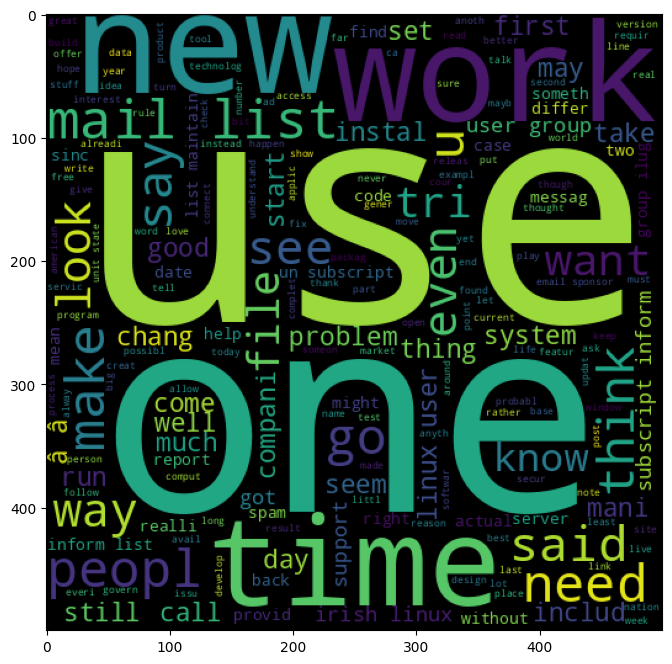

In [ ]:
# ham word cloud
body = ''.join(df[df['Label'] == 0]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)

# Most common words in spam & ham

In [ ]:
spam_corpus = []

for msg in df[df.Label == 1]['clean_text'].tolist():
    for word in msg.split():
        
        spam_corpus.append(word)
        
gem_corpus = []

for msg in df[df.Label == 0]['clean_text'].tolist():
    for word in msg.split():
        
        gem_corpus.append(word)

In [ ]:
len(spam_corpus) , len(gem_corpus)

(262206, 580744)

In [ ]:
spam_10 = Counter(spam_corpus).most_common(10)
gem_10 = Counter(gem_corpus).most_common(10)

In [ ]:
spam_keys = []
spam_values = []
for item in spam_10:
    spam_keys.append(item[0])
    spam_values.append(item[1])

In [ ]:
gem_keys = []
gem_values = []
for item in gem_10:
    gem_keys.append(item[0])
    gem_values.append(item[1])

<Axes: >

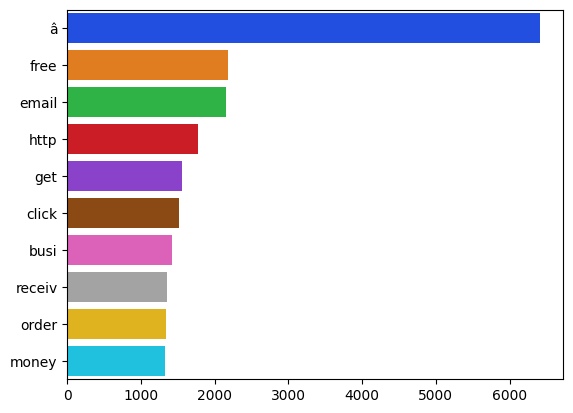

In [ ]:
palette_color = sns.color_palette('bright')
sns.barplot(y = spam_keys,x = spam_values, palette= palette_color)

<Axes: >

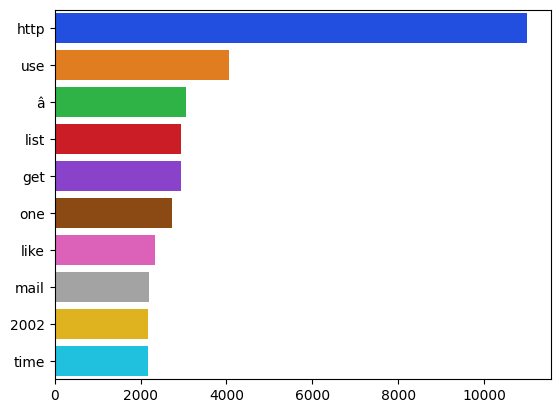

In [ ]:
palette_color = sns.color_palette('bright')
sns.barplot(y = gem_keys,x = gem_values, palette= palette_color)

In [ ]:
contain_values = df[df['clean_text'].str.contains('â')]
print (contain_values)

                                                    text  Label  \
4      \nHome Based Business  <!--\na:hover { color:#...      1   
52     Tech Update TodayVITAL SIGNS FOR JULY 19, 2002...      0   
60       | Date: Fri, 19 Jul 2002 22:00:02 +0100\n  |...      0   
64     HELLO...By reading the short Summary just belo...      1   
71     \nShopper Newsletter: Alerts\nLive tech help N...      0   
...                                                  ...    ...   
10312  Canning spam without eating up real mailÂ Sear...      0   
10340  Shoot your wad all over her face.\nThese Girls...      1   
10345  creditfixThank You,Your email address was obta...      1   
10360  \n"Finally - You \nToo Can Make eBay Into\nA N...      1   
10430  Easy to make "Between $200,000 and $500,000 ev...      1   

                                              clean_text  
4      home base busi hover color cc0000 bold h1 colo...  
52     tech updat todayvit sign juli 19 2002 david be...  
60     date fri 19

# Model Training

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
X = df['clean_text']
y = df.Label

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test  = vect.transform(X_test)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

In [ ]:
algorithm = ['ComplementNB', 'BernoulliNB','MultinomialNB']
accuracy=[]
precision=[]
recall=[]
confusion=[]

In [ ]:
CNB = ComplementNB()
CNB.fit(X_train,y_train)
y_pred = CNB.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
confusion.append(confusion_matrix(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

0.9234449760765551
[[1554  123]
 [  37  376]]
0.7535070140280561
0.910411622276029


In [ ]:
DTC = BernoulliNB()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
confusion.append(confusion_matrix(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

0.8722488038277512
[[1618   59]
 [ 208  205]]
0.7765151515151515
0.4963680387409201


In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_pred = MNB.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
confusion.append(confusion_matrix(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

0.9626794258373206
[[1642   35]
 [  43  370]]
0.9135802469135802
0.8958837772397095


In [ ]:
performance = pd.DataFrame({
    'Algorithm' : algorithm ,
    'Accuracy' : accuracy ,
    'Precision' : precision,
    'Recall' : recall,
    'Confusion Matrix': confusion,
}).sort_values(['Precision','Accuracy'],ascending = False)

In [ ]:
performance

,Algorithm,Accuracy,Precision,Recall,Confusion Matrix
2,MultinomialNB,0.962679,0.913580,0.895884,"[[1642, 35], [43, 370]]"
1,BernoulliNB,0.872249,0.776515,0.496368,"[[1618, 59], [208, 205]]"
0,ComplementNB,0.923445,0.753507,0.910412,"[[1554, 123], [37, 376]]"
